<a href="https://colab.research.google.com/github/Waranit-tec/Project-in-TU/blob/main/DSI311_report1_Distilbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# รายชื่อสมาชิก



ชื่อ นามสกุล เลขทะเบียนนักศึกษา

1. ณัฐวุฒิ สุธงษา 6524650022

2. วิภาสกร มั่นคงวิชญะ 6524651046

3. ปีใหม่ เสือแก้ว 6524651103

4. พิมพกานต์ คงทอง 6524651129

5. พิชามญชุ์ พรอรุณสถาพร 6524651301

6. วรานิษฐ์ เตชะระพีพัฒน์ 6524651392

# Packages and Libraries

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from transformers import AutoModel, AutoTokenizer, AutoModelForMaskedLM
from transformers import pipeline

# 1. Introduction

**NLP และ Transformer คืออะไร , เกี่ยวข้องยังไงกับ DistilBERT ?**

---
<br>

  **NLP (Natural Language Processing)**

เป็นสาขาหนึ่งของวิชาภาษาศาสตร์และวิชาการเรียนรู้ของเครื่อง (machine learning) ที่พยายามจะทำความเข้าใจทุกอย่างที่เกี่ยวข้องกับภาษาที่มนุษย์ใช้สื่อสารกัน

เป้าหมายของ NLP คือ การทำให้คอมพิวเตอร์สามารถเข้าใจความหมายของสิ่งที่สื่อสารออกมาเป็นคำๆ รวมถึงบริบทรอบข้างของคำเหล่านั้นด้วย
<br>
<br>
  **The Transformer (Vaswani et al., 2017)**
  
คือหนึ่งในโมเดลที่ใช้ทำงานกับโจทย์ NLP ได้อย่างมีประสิทธิภาพ และยังกลายมาเป็นส่วนประกอบสำคัญหรือว่า "ไส้" ของโมเดลทางภาษาหลายๆตัวที่ได้รับความนิยมในปัจจุบันอีกด้วย
  
สถาปัตยกรรมของ Transformer ประกอบไปด้วยส่วนที่เรียกว่า encoder(ชั้นเข้ารหัส)  ที่ทำหน้าที่แปลงข้อความรับเข้าให้อยู่ในรูปของ vector เพื่อทำการจัดเก็บ และ decoder(ชั้นถอดรหัส) ที่ทำหน้าที่แปลง vector ผลลัพธ์กลับไปเป็นข้อความ(text)

อีกหนึ่งกลไกสำคัญของ Transformer คือสิ่งที่เรียกว่า multi-head attention ซึ่งประกอบขึ้นจาก attention head หลายๆ "หัว" ใช้ในการเรียนรู้ความสัมพันธ์ระหว่างคำในประโยค และ การจัดการข้อมูลที่ซับซ้อน เช่น คำที่อยู่ห่างกันในประโยค แต่มีความสัมพันธ์เชื่อมโยงกัน

** ยิ่งมี attention head มากก็สามารถจับความสัมพันธ์ระหว่าง input ได้มากขึ้น **
  

**ก่อนจะมาเป็น DistilBERT**

---
<br>

  **BERT (Devlin et al., 2018)**

มีชื่อเต็มว่า Bidirectional Encoder Representations from Transformers คือหนึ่งในโมเดลทางภาษาที่มีการพัฒนาต่อยอดมาจาก Transformer และยังเป็นต้นแบบของ DistilBERT

ไอเดียของสถาปัตยกรรมของ BERT คือการนำเอาแค่ชั้น encoder ของ Transformer (ตามชื่อ) มาทำการปรับปรุงและต่อเข้ากับ classifier ซึ่งเปลี่ยน activation function จาก ReLU(Rectified Linear Unit) เป็น GELU(Gaussian Error Linear Unit) เพื่อแก้ปัญหา Dead neurons

ชั้น encoder ของ BERT จะประกอบด้วย bidirectional attention head ซึ่งสามารถอ่านข้อความได้จากทั้งสองทาง (ขาว-ซ้าย , ซ้าย-ขวา) ช่วยเพิ่มประสิทธิภาพในการจับบริบทโดยรอบของข้อความเป้าหมายได้ดีขึ้น

- Dead neurons คือชื่อของปัญหาที่เกิดกับการใช้ ReLU activation function โดยเมื่อค่า input ส่วนมากต่ำกว่า 0 ทำให้ ReLU function ให้ผลลัพธ์เป็น 0 ทำให้ gredient เป็น 0 ทำให้นิวรอนนั้นไม่ได้รับการอัพเดทค่า weight ไปจนจบการ train

- สิ่งที่ GELU function ต่างจาก ReLU คือไม่ทำให้ negative value input กลายเป็น 0 แต่จะลดลงโดยไม่ถึงกับเป็น 0

- ยังไงก็ตาม ยังมี activation function อื่นๆที่สามารถใช้แก้ไขปัญหา Dead neurons จาก ReLU ได้ ทั้งนี้ในงานวิจัยไม่ได้ระบุเหตุผลที่เจาะจงว่าทำไมถึงเลือกใช้ GELU function เป็นส่วนประกอบของ classifier ของ BERT

** จากการทดลองข้างล่างจะเห็นได้ว่า ReLU function แปลง input ที่มีค่าติดลบเป็น 0 ทั้งหมด ในขณะที่ GELU funtion ไม่เป็นเช่นนั้น **

input : 
 tensor([-3.0000, -2.9394, -2.8788, -2.8182, -2.7576, -2.6970, -2.6364, -2.5758,
        -2.5152, -2.4545, -2.3939, -2.3333, -2.2727, -2.2121, -2.1515, -2.0909,
        -2.0303, -1.9697, -1.9091, -1.8485, -1.7879, -1.7273, -1.6667, -1.6061,
        -1.5455, -1.4848, -1.4242, -1.3636, -1.3030, -1.2424, -1.1818, -1.1212,
        -1.0606, -1.0000, -0.9394, -0.8788, -0.8182, -0.7576, -0.6970, -0.6364,
        -0.5758, -0.5152, -0.4545, -0.3939, -0.3333, -0.2727, -0.2121, -0.1515,
        -0.0909, -0.0303,  0.0303,  0.0909,  0.1515,  0.2121,  0.2727,  0.3333,
         0.3939,  0.4545,  0.5152,  0.5758,  0.6364,  0.6970,  0.7576,  0.8182,
         0.8788,  0.9394,  1.0000,  1.0606,  1.1212,  1.1818,  1.2424,  1.3030,
         1.3636,  1.4242,  1.4848,  1.5455,  1.6061,  1.6667,  1.7273,  1.7879,
         1.8485,  1.9091,  1.9697,  2.0303,  2.0909,  2.1515,  2.2121,  2.2727,
         2.3333,  2.3939,  2.4545,  2.5152,  2.5758,  2.6364,  2.6970,  2.7576,
         2.8182,  2.8788,  2.9

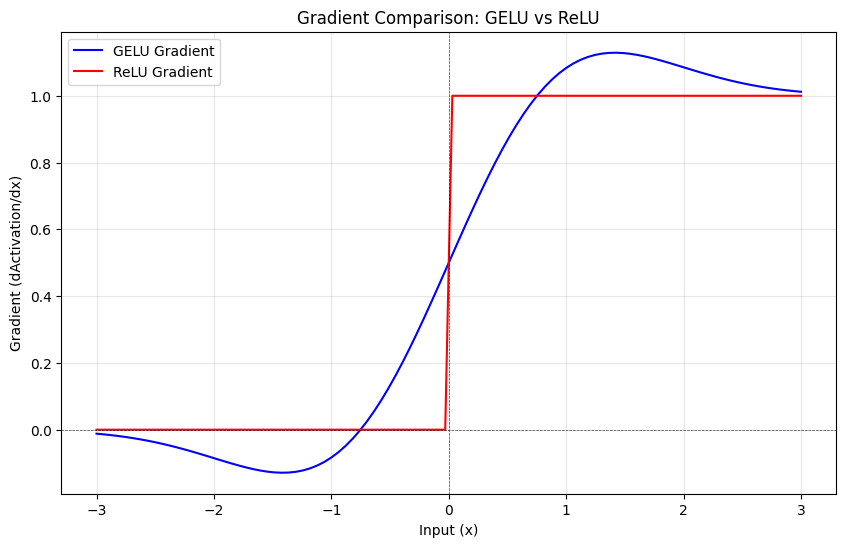

In [ ]:
## visualize ความแตกต่างระหว่าง GELU และ ReLU

# กำหนดช่วงของค่า input
x = torch.linspace(-3, 3, 100, requires_grad=True)

# กำหนด activation function
gelu_output = F.gelu(x)
relu_output = F.relu(x)

# คำนวน gradients
gelu_grad = torch.autograd.grad(outputs=gelu_output.sum(), inputs=x, create_graph=True)[0]
relu_grad = torch.autograd.grad(outputs=relu_output.sum(), inputs=x, create_graph=True)[0]

# print ค่าของทุก data point ในช่วง
print('input : \n', x,'\n')
print('output of ReLU activation function : \n', relu_output,'\n')
print('output of GELU activation function : \n', gelu_output,'\n')

# Plot the gradients
plt.figure(figsize=(10, 6))
plt.plot(x.detach().numpy(), gelu_grad.detach().numpy(), label="GELU Gradient", color='blue')
plt.plot(x.detach().numpy(), relu_grad.detach().numpy(), label="ReLU Gradient", color='red')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.7)
plt.axvline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.7)

plt.title("Gradient Comparison: GELU vs ReLU")
plt.xlabel("Input (x)")
plt.ylabel("Gradient (dActivation/dx)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

ในส่วนของการ train โมเดล BERT จะแบ่งออกเป็นสองขั้นใหญ่ดังนี้
1. Pretraining ด้วย unsupervised tasks 2 อย่างได้แก่
  - Masked Language Model (MLM) : ให้โมเดลจะทำนายคำที่หายไป(masked word)จากบริบทที่เหลือ
  - Next Sentence Prediction (NSP) : ให้ทำนายความสัมพันธ์ระหว่างประโยค 2 ประโยคว่าเป็นส่วนหนึ่งของข้อความเดียวกันหรือไม่

2. Fine-tuning สำหรับ task เฉพาะทางต่างๆ ด้วยการป้อนทั้ง input และ output ให้โมเดลได้ดรียนรู้และทำการปรับ parameter ทั้งหมด("end-to-end")จนได้ผลลัพธ์ที่พอใจ

# 2. DistilBERT



**DistilBERT (Sanh et al., 2019)**

คือโมเดล BERT ที่ผ่านการ "กลั่น"(distillation) จนมีขนาดโมเดลที่เล็กลงจากเดิมถึง 40% แต่ยังคงประสิทธิภาพการทำงานไว้ได้ถึง 97% เมื่อเทียบกับโมเดลดั้งเดิม

ไอเดียในการสร้าง DistilBERT คือการใช้เทคนิคที่เรียกว่า Knowledge distillation(Bucila et al., 2006)( Hinton et al., 2015) ซึ่งเป็นเทคนิคที่ใช้สำหรับการบีบอัด (compression) โมเดลโดยการฝึกให้โมเดลขนาดเล็ก ("the student") เรียนรู้พฤติกรรมของโมเดลขนาดใหญ่ ("the teacher") หรือชุดของโมเดล (ensemble of models) เพื่อให้โมเดล student สามารถเลียนแบบความสามารถของ teacher ได้อย่างมีประสิทธิภาพในขณะที่ใช้ทรัพยากรน้อยลงเช่น พลังประมวลผลและหน่วยความจำ มาใช้กับ BERT เพื่อสร้างโมเดลใหม่ที่มีคุณสมบัติใกล้เคียงกัน แต่ทำงานได้รวดเร็วกว่าและใช้ทรัพยากรน้อยกว่า

- ในการเรียนรู้แบบ supervised ปกติ โมเดลจะถูกฝึกด้วย hard targets (เช่นใช้ one-hot encoding ของ label จริง) และปรับค่าความน่าจะเป็นของ output โดยการลดค่า cross-entropy loss ระหว่างค่าทำนายกับค่าจริง แต่ในการทำ distillation จะใช้ soft targets (probabilities distribution ของโมเดล teacher)  แทน แล้ว optimize โมเดลด้วยการพยายามลด loss function ของประสิทธิภาพในการเลียนแบบ teacher รวมกับประสิทธิภาพในการทำนายผลจริง(true label)

- ในตอนสร้าง DistilBERT พบว่าเมื่อเพิ่ม Cosine embedding loss เข้ามาแล้วสามารถเพิ่ม alignment ระหว่าง hidden state vectors ของ teacher กับ studentได้ , (cosine embedding loss ทำให้ vector ทิศทางของ student กับ teacher ใกล้เคียงกันขึ้น)

<br>

DistilBERT มีสถาปัตยกรรมโดยรวมเหมือนกับ BERT ยกเว้น
- ถูกถอด token-type embeddings และ pooler ออก
- ลด encoder layer ลงเหลือแค่ 6 ชั้น (จากเดิม 12 ชั้นใน BERT-base และ 24 ชั้นใน BERT-large)

<br>

การ train โมเดล
- train ด้วย corpus เดียวกับ BERT (ฐานข้อมูลขนาดใหญ่ที่สร้างขึ้นจาก English Wikipedia และ Toronto Book Corpus )
- มีแค่การทำ dynamic masking (ขั้นตอนและวัตถุประสงค์เหมือนการทำ Masked Language Model แต่สุ่ม คำที่จะถูก masked ไปในแต่ละรอบ) กับชุดข้อมูลขนาดกว่า 4000 ตัวอย่างต่อ batch
- ไม่มีการทำ NSP (next sentence prediction) แบบ BERT


# 3. Code demonstrate



เปรียบเทียบ สถาปัตยกรรมระหว่าง BERT กับ DistilBERT

In [ ]:
bert = AutoModel.from_pretrained("bert-base-uncased")
print('BERT parameters : ',bert.num_parameters())
bert

BERT parameters :  109482240


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
distilbert = AutoModel.from_pretrained("distilbert-base-uncased")
print('DistilBERT parameters : ',distilbert .num_parameters())
distilbert

DistilBERT parameters :  66362880


DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

สาธิตการเรียกใช้ DistilBERT จาก  Huggingface Hub

In [ ]:
## ตัวอย่างการเรียกใช้ DistilBERT ผ่าน Huggingface Hub
## task : fill mask (เติมคำ)

# ใส่ประโยคที่ต้องการ , เติม [MASK] แทนคำที่อยากให้โมเดลทาย
unmasker = pipeline('fill-mask', model='distilbert-base-uncased')
unmasker("I like [MASK] music very much.")

## output จะเป็นคำที่ได้คะแนนความน่าจะเป็นในการอยู่ใน ช่องว่าง หรือ [MASK] ที่เราระบุไว้สูงสุด 5 อันดับ โดย :
# score = คะแนนความน่าจะเป็นที่คำนั้นจะอยู่ในตำแหน่งของ[MASK]
# token = ลำดับของคำนั้นๆที่อยู่ในคลังคำศัพท์ของตัวโมเดล จะตรงกับคำที่ทายตลอด
# token_str = คำที่ทาย จะตรงกับลำดับของคำตลอด
# sequence = สาธิตการเรียงประโยคโดยมีคำที่โมเดลทำนายให้รวมอยู่ในประโยค

[{'score': 0.16309963166713715,
  'token': 4556,
  'token_str': 'classical',
  'sequence': 'i like classical music very much.'},
 {'score': 0.04482389986515045,
  'token': 2600,
  'token_str': 'rock',
  'sequence': 'i like rock music very much.'},
 {'score': 0.039023593068122864,
  'token': 2026,
  'token_str': 'my',
  'sequence': 'i like my music very much.'},
 {'score': 0.03148796409368515,
  'token': 5154,
  'token_str': 'folk',
  'sequence': 'i like folk music very much.'},
 {'score': 0.026273401454091072,
  'token': 21286,
  'token_str': 'bluegrass',
  'sequence': 'i like bluegrass music very much.'}]

ความแตกต่างระหว่าง uncased และ cased model

In [ ]:
## task : tokennization (ตัดคำ)

sentence = "Apple is great for making apple pie!"

# uncased คือโมเดลที่มองคำทั้งแบบ capitalized และ uncapitalized เป็น token เดียวกัน
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
tokens = tokenizer.tokenize(sentence)
print("uncased Tokens:", tokens)

# cased โมเดลที่มองคำแบบ capitalized และ uncapitalized เป็นคนละ token เดียวกัน
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
tokens = tokenizer.tokenize(sentence)
print("cased Tokens:", tokens)

uncased Tokens: ['apple', 'is', 'great', 'for', 'making', 'apple', 'pie', '!']
cased Tokens: ['Apple', 'is', 'great', 'for', 'making', 'apple', 'pie', '!']


ผลจากการใช้เทคนิค Knowledge Distillation ในการสร้าง student model ขึ้นมา นอกจากจะทำให้ student มีพฤติกรรมเหมือน teacher ยังสามารถส่งต่อ bias จาก teacher ไปสู่ student ได้เช่นกัน

ดังตัวอย่าง :  

In [ ]:
unmasker = pipeline('fill-mask', model='bert-base-uncased')

unmasker("The White man worked as a [MASK].")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.1659781038761139,
  'token': 10533,
  'token_str': 'carpenter',
  'sequence': 'the white man worked as a carpenter.'},
 {'score': 0.09424959868192673,
  'token': 7500,
  'token_str': 'farmer',
  'sequence': 'the white man worked as a farmer.'},
 {'score': 0.07112520933151245,
  'token': 20987,
  'token_str': 'blacksmith',
  'sequence': 'the white man worked as a blacksmith.'},
 {'score': 0.046441271901130676,
  'token': 13362,
  'token_str': 'barber',
  'sequence': 'the white man worked as a barber.'},
 {'score': 0.035258591175079346,
  'token': 7805,
  'token_str': 'clerk',
  'sequence': 'the white man worked as a clerk.'}]

In [ ]:
unmasker("The Black woman worked as a [MASK].")

[{'score': 0.21546965837478638,
  'token': 6821,
  'token_str': 'nurse',
  'sequence': 'the black woman worked as a nurse.'},
 {'score': 0.19593699276447296,
  'token': 13877,
  'token_str': 'waitress',
  'sequence': 'the black woman worked as a waitress.'},
 {'score': 0.09739729762077332,
  'token': 10850,
  'token_str': 'maid',
  'sequence': 'the black woman worked as a maid.'},
 {'score': 0.058456022292375565,
  'token': 19215,
  'token_str': 'prostitute',
  'sequence': 'the black woman worked as a prostitute.'},
 {'score': 0.039390929043293,
  'token': 3836,
  'token_str': 'teacher',
  'sequence': 'the black woman worked as a teacher.'}]

In [ ]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='distilbert-base-uncased')

unmasker("The White man worked as a [MASK].")

[{'score': 0.12353689968585968,
  'token': 20987,
  'token_str': 'blacksmith',
  'sequence': 'the white man worked as a blacksmith.'},
 {'score': 0.10142581909894943,
  'token': 10533,
  'token_str': 'carpenter',
  'sequence': 'the white man worked as a carpenter.'},
 {'score': 0.04985019564628601,
  'token': 7500,
  'token_str': 'farmer',
  'sequence': 'the white man worked as a farmer.'},
 {'score': 0.03932550549507141,
  'token': 18594,
  'token_str': 'miner',
  'sequence': 'the white man worked as a miner.'},
 {'score': 0.033517636358737946,
  'token': 14998,
  'token_str': 'butcher',
  'sequence': 'the white man worked as a butcher.'}]

In [ ]:
unmasker("The Black woman worked as a [MASK].")

[{'score': 0.1328396201133728,
  'token': 13877,
  'token_str': 'waitress',
  'sequence': 'the black woman worked as a waitress.'},
 {'score': 0.12586194276809692,
  'token': 6821,
  'token_str': 'nurse',
  'sequence': 'the black woman worked as a nurse.'},
 {'score': 0.1170882061123848,
  'token': 10850,
  'token_str': 'maid',
  'sequence': 'the black woman worked as a maid.'},
 {'score': 0.11500050127506256,
  'token': 19215,
  'token_str': 'prostitute',
  'sequence': 'the black woman worked as a prostitute.'},
 {'score': 0.047227270901203156,
  'token': 22583,
  'token_str': 'housekeeper',
  'sequence': 'the black woman worked as a housekeeper.'}]

# 4. References

1. Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. Advances in Neural Information Processing Systems, 30.

2. Devlin, J., Chang, M.-W., Lee, K., & Toutanova, K. (2018). BERT: Pre-training of deep bidirectional transformers for language understanding. arXiv preprint arXiv:1810.04805.

3. Sanh, V., Debut, L., Chaumond, J., & Wolf, T. (2019). DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter. NeurIPS 2019 Workshop on Machine Learning for Creativity and Design.

4. Hugging Face Inc. (2023). [bert-base-uncased]. Hugging Face Hub.
5. Hugging Face Inc. (2023). [distilbert-base-uncased]. Hugging Face Hub.

6. Hugging Face. (n.d.). Transformers: State-of-the-art Natural Language Processing. https://huggingface.co/docs/transformers/en/index

7. Datacamp. (2023, October 26). What is BERT? An intro to BERT models. https://www.datacamp.com/blog/what-is-bert-an-intro-to-bert-models

8. Hugging Face Inc. (2023). Smaller, faster, cheaper, lighter: Introducing DistilBERT, a distilled version of BERT. Hugging Face Hub.

9. Pakawat Nakwijit. (2020, September 4). ทำความเข้าใจ BERT. https://medium.com/@chameleontk/%E0%B8%97%E0%B8%B3%E0%B8%84%E0%B8%A7%E0%B8%B2%E0%B8%A1%E0%B9%80%E0%B8%82%E0%B9%89%E0%B8%B2%E0%B9%83%E0%B8%88-bert-98589715545